<a href="https://colab.research.google.com/github/nirjalalala/learn_ml/blob/main/Day_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis** (Part - II)

##**DATA PREPROCESSING**

In [ ]:
#importing the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset

df = sns.load_dataset('titanic')


In [ ]:
#Printing first five rows to confirm that the dataframe has been loaded properly

print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
#Understanding our dataset better by checking the columns, null-values and data types

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
# Checking duplicate values

print(df.duplicated().sum())

107


There are 107 duplicate values.

After running the above code block ( the one with .info() ),<br> we observe that there are different non-null values in different rows. Let's explore that further.

In [ ]:
#Printing null-value count in each column

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


After running the above code,<br><br>
'embark_town' has only two missing values.<br>
'age' has 177 missing values.<br>
'deck' has 688 missing values.<br><br>
Previously, we observed that our dataset has a total of 891 entries. So, it'd be reasonable to drop 'deck' column and replace missing values in 'age' column by some average value.<br><br>
Before making changes, let's create a new copy of the dataframe.

In [ ]:
#creating a copy of the dataframe

df_copy = df.copy()

In [ ]:
#printing the new copy
print(df_copy.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


'alive' and 'survived' columns give the same information. So, we can drop one of them, let's drop 'alive' column.<br><br>
Similarly, 'who', 'sex' and 'adult_male' are essentially the same. All of these columns define whether or not the passenger is a male (male or female). Let's drop the 'who' and 'adult_man' column.<br><br>
We can see similar relationship between 'pclass' and 'class' so let's drop the 'class' column.

In [ ]:
print(df_copy["embarked"].unique())
print(df_copy["embark_town"].unique())

['S' 'C' 'Q' nan]
['Southampton' 'Cherbourg' 'Queenstown' nan]


'embarked' simply contains the first letter of the entry in 'embark_town' so we don't need 'embarked' column to draw any important conclusions. Hence, we can drop that column as well.<br><br>

In [ ]:
#dropping the redundant columns

df_copy.drop(columns=["deck","embarked","alive","who","adult_male","class"], axis=1, inplace=True)

In [ ]:
#printing the dataframe again to see the difference

print(df_copy.head())

   survived  pclass  sex   age  sibsp  parch     fare  embark_town  alone
0         0       3    0  22.0      1      0   7.2500  Southampton  False
1         1       1    1  38.0      1      0  71.2833    Cherbourg  False
2         1       3    1  26.0      0      0   7.9250  Southampton   True
3         1       1    1  35.0      1      0  53.1000  Southampton  False
4         0       3    0  35.0      0      0   8.0500  Southampton   True


In [ ]:
#check null- values in 'age' column
print(df_copy['age'].isnull().sum())

177


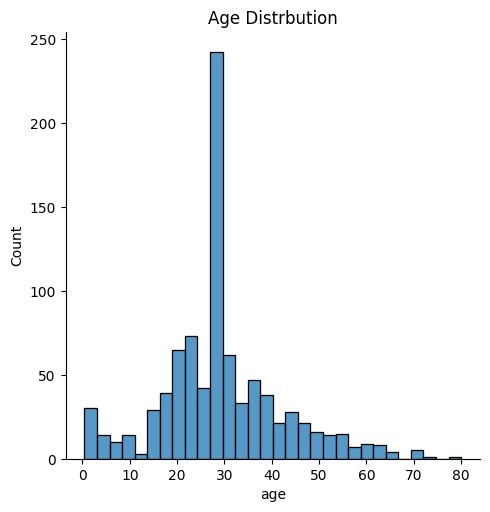

In [ ]:
# histogram for 'age' column

sns.displot(df_copy['age'])
plt.title('Age Distrbution')
plt.show()

In [ ]:
#Filling null values in 'age' column with median value

df_copy['age'] = df_copy['age'].fillna(df_copy['age'].median())


In [ ]:
#check null- values in 'age' column
print(df_copy['age'].isnull().sum())

0


In [ ]:
#check null values in 'embark_town' column
print(df_copy['embark_town'].isnull().sum())

2


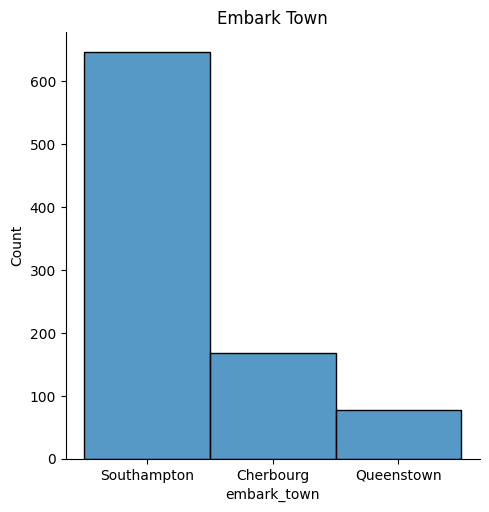

In [ ]:
#distribution plot for 'embark_town' column

sns.displot(df_copy['embark_town'])
plt.title('Embark Town')
plt.show()

In [ ]:
#Since 'embark_town' is a categorical column
#let's fill the null values with the mode value

df_copy['embark_town'] = df_copy['embark_town'].fillna(df_copy['embark_town'].mode()[0])

In [ ]:
#check null values in 'embark_town' column
print(df_copy['embark_town'].isnull().sum())

0


Now, all missing values are filled or dropped. A complete dataset is ready.

In [ ]:
#Checking all null values
print(df_copy.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64


In [ ]:
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB
None


Since, 'sex' is a categorical column and has 'female' and 'male' values.<br>
Let's perform one-hot encoding to convert into 0 and 1.<br>
0 for "male" and 1 for "female".

In [ ]:
#Encoding categories values
df_copy['sex'] =df_copy['sex'].map({'male':0,'female':1})

In [ ]:
#Printing values for 'sex'
print(df_copy['sex'].unique())

[0 1]


In [ ]:
# Now, our dataset looks like this.
print(df_copy.head())

   survived  pclass  sex   age  sibsp  parch     fare  embark_town  alone
0         0       3    0  22.0      1      0   7.2500  Southampton  False
1         1       1    1  38.0      1      0  71.2833    Cherbourg  False
2         1       3    1  26.0      0      0   7.9250  Southampton   True
3         1       1    1  35.0      1      0  53.1000  Southampton  False
4         0       3    0  35.0      0      0   8.0500  Southampton   True


###**CONCLUSION**
---
Now, our data is ready for analysis and feeding into models.

---

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6b14fef518b0752557444deb7dd15004dc2ddcc99b56af82eab56e076843dddf
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport
from IPython.display import display

profile = ProfileReport(df_copy)
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 31.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]